# loan_data_set.csv

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics


In [2]:
warnings.filterwarnings('ignore')

# build a model to predict whether a loan application should be given loan 
- Loan_Status is label/target/y column
- predicting discrete value (Y/N) : classification problem

In [6]:
df=pd.read_csv('data/loan_data_set.csv')

In [14]:
df=df.drop('Loan_ID',axis=1)

In [7]:
df[:5]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [11]:
newcols=['gender','married','dependents','edu','selfemp','appinc','coappinc','amnt','term','chistory','proparea','status']

In [15]:
len(newcols)

12

In [16]:
df.columns=newcols

## dataset contains numeric and categorical(object) columns 

In [17]:
df.shape

(614, 12)

## dataset has 614 records and 12 columns

In [18]:
df.shape[0]

614

In [19]:
df.isna().sum()/df.shape[0]

gender        0.021173
married       0.004886
dependents    0.024430
edu           0.000000
selfemp       0.052117
appinc        0.000000
coappinc      0.000000
amnt          0.035831
term          0.022801
chistory      0.081433
proparea      0.000000
status        0.000000
dtype: float64

In [20]:
df=df.dropna() ## droping all missing values

# checking class imbalance 

In [21]:
df['status'].value_counts()/df.shape[0]

Y    0.691667
N    0.308333
Name: status, dtype: float64

 # y->69% n-> 31% ==> no class imbalance 

In [22]:
df['status']=df['status'].replace({'Y':1,'N':0})

In [23]:
df['status'].value_counts()

1    332
0    148
Name: status, dtype: int64

## out of FN and FP , which is more dangerous ?
- FP is more problematic for this problem as predicting a non loan worthy as worthy mean more loss for bank
- 'precision' is more imprtant than 'recall'

# Metrics for this problem 

## 1> AUC: to prove model is not random 
## 2> precision


In [24]:
X=df.drop('status',axis=1)
y=df['status']

In [25]:
X[:3]

,gender,married,dependents,edu,selfemp,appinc,coappinc,amnt,term,chistory,proparea
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban


In [26]:
catcols=list(X.select_dtypes(include='object').columns)

In [27]:
numcols = list(X.select_dtypes(exclude='object').columns)

In [28]:
catcols

['gender', 'married', 'dependents', 'edu', 'selfemp', 'proparea']

In [29]:
numcols

['appinc', 'coappinc', 'amnt', 'term', 'chistory']

## building Logistic Regression model 
- catgorical /discrete columns MUST be encoded using OHE
- numric columns MUST be scaled 

In [30]:
X[numcols][:5]

,appinc,coappinc,amnt,term,chistory
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
5,5417,4196.0,267.0,360.0,1.0


In [31]:
X['chistory'].value_counts()

1.0    410
0.0     70
Name: chistory, dtype: int64

### as 'chistory' has only 2 values , it is discrete column

In [32]:
X['term'].value_counts()

360.0    411
180.0     36
480.0     12
300.0      9
84.0       3
120.0      3
36.0       2
240.0      2
60.0       2
Name: term, dtype: int64

## considering 'term' as continuous

In [33]:
numcols.remove('chistory')

In [34]:
numcols

['appinc', 'coappinc', 'amnt', 'term']

In [35]:
catcols.append('chistory')

In [36]:
catcols

['gender', 'married', 'dependents', 'edu', 'selfemp', 'proparea', 'chistory']

## implementing OHE 

In [37]:
Xohe=pd.get_dummies(X,columns=catcols,drop_first=True)

In [38]:
Xohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   appinc              480 non-null    int64  
 1   coappinc            480 non-null    float64
 2   amnt                480 non-null    float64
 3   term                480 non-null    float64
 4   gender_Male         480 non-null    uint8  
 5   married_Yes         480 non-null    uint8  
 6   dependents_1        480 non-null    uint8  
 7   dependents_2        480 non-null    uint8  
 8   dependents_3+       480 non-null    uint8  
 9   edu_Not Graduate    480 non-null    uint8  
 10  selfemp_Yes         480 non-null    uint8  
 11  proparea_Semiurban  480 non-null    uint8  
 12  proparea_Urban      480 non-null    uint8  
 13  chistory_1.0        480 non-null    uint8  
dtypes: float64(3), int64(1), uint8(10)
memory usage: 23.4 KB


In [39]:
Xohe.shape

(480, 14)

In [40]:
X.shape

(480, 11)

In [41]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(Xohe,y,test_size=.15,random_state=42)

In [42]:
Xtrain[:3]

,appinc,coappinc,amnt,term,gender_Male,married_Yes,dependents_1,dependents_2,dependents_3+,edu_Not Graduate,selfemp_Yes,proparea_Semiurban,proparea_Urban,chistory_1.0
265,4095,3447.0,151.0,360.0,1,0,0,0,0,0,0,0,0,1
191,12000,0.0,164.0,360.0,1,0,0,0,0,0,0,1,0,1
199,11000,0.0,83.0,360.0,1,0,0,0,0,0,1,0,1,1


## implementing scaling  (standard scaler)

In [43]:
scaler=preprocessing.StandardScaler()
scaler.fit(Xtrain[numcols])
Xtrain[numcols]=scaler.transform(Xtrain[numcols])
Xtest[numcols]=scaler.transform(Xtest[numcols])

In [44]:
Xtrain[:3]

,appinc,coappinc,amnt,term,gender_Male,married_Yes,dependents_1,dependents_2,dependents_3+,edu_Not Graduate,selfemp_Yes,proparea_Semiurban,proparea_Urban,chistory_1.0
265,-0.222741,0.681801,0.111985,0.287834,1,0,0,0,0,0,0,0,0,1
191,1.103185,-0.587477,0.282863,0.287834,1,0,0,0,0,0,0,1,0,1
199,0.935452,-0.587477,-0.781835,0.287834,1,0,0,0,0,0,1,0,1,1


In [45]:
Xtrain_orig=Xtrain.copy()
Xtest_orig=Xtest.copy()

## implementing base model using Logistic Regression

In [46]:
model=linear_model.LogisticRegression()
model.fit(Xtrain,ytrain)
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)

In [47]:
print('AUC : ',np.round(metrics.roc_auc_score(ytrain,predtrain),4)) # .5<= auc <=1 , ,5 =worst(random)

AUC :  0.7001


In [48]:
print('AUC : ',np.round(metrics.roc_auc_score(ytest,predtest),4))

AUC :  0.7381


In [49]:
def printmetrics(actual,predicted):
    print('AUC : ',np.round(metrics.roc_auc_score(actual,predicted),4))
    print('Accuracy :',np.round(metrics.accuracy_score(actual,predicted),4))
    print('Precision : ',np.round(metrics.precision_score(actual,predicted),4))
    print('Recall : ',np.round(metrics.recall_score(actual,predicted),4))
    print('F1 : ',np.round(metrics.f1_score(actual,predicted),4))
    
    

In [50]:
print('TRAINING METRICS')
print('----------------')
printmetrics(ytrain,predtrain)

TRAINING METRICS
----------------
AUC :  0.7001
Accuracy : 0.8039
Precision :  0.7896
Recall :  0.9751
F1 :  0.8726


In [51]:
print('TEST METRICS')
print('----------------')
printmetrics(ytest,predtest)

TEST METRICS
----------------
AUC :  0.7381
Accuracy : 0.8472
Precision :  0.8226
Recall :  1.0
F1 :  0.9027


## feature selection
- using model ( by comparing weight)
- helpfull for Exploratory Data Analysis(EDA)

In [52]:
model.coef_

array([[ 0.05240802, -0.14401959, -0.18192689, -0.06314722,  0.23773216,
         0.51737295, -0.37016913,  0.19045951, -0.02171857, -0.40512658,
        -0.16977248,  0.74293664,  0.08126328,  2.89714115]])

In [53]:
pd.Series(np.abs(model.coef_[0]),index=Xtrain.columns).sort_values(ascending=False)

chistory_1.0          2.897141
proparea_Semiurban    0.742937
married_Yes           0.517373
edu_Not Graduate      0.405127
dependents_1          0.370169
gender_Male           0.237732
dependents_2          0.190460
amnt                  0.181927
selfemp_Yes           0.169772
coappinc              0.144020
proparea_Urban        0.081263
term                  0.063147
appinc                0.052408
dependents_3+         0.021719
dtype: float64

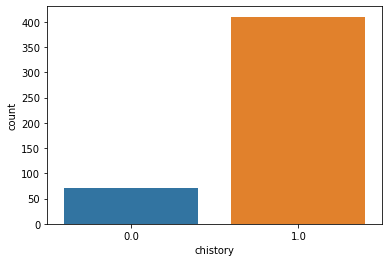

In [54]:
sns.countplot(x='chistory',data=df) # using countplot as 'chistory' is discrete/categorical

In [55]:
df['chistory'].value_counts()

1.0    410
0.0     70
Name: chistory, dtype: int64

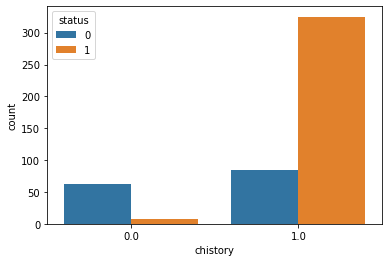

In [56]:
sns.countplot(x='chistory',hue='status',data=df)

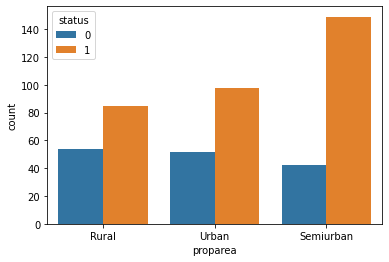

In [57]:
sns.countplot(x='proparea',hue='status',data=df)

In [58]:
df['proparea'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: proparea, dtype: int64

In [59]:
pd.crosstab(index=df['proparea'],columns=df['status'],normalize=True)

status,0,1
proparea,,
Rural,0.112500,0.177083
Semiurban,0.087500,0.310417
Urban,0.108333,0.204167


In [60]:
Xtrain=Xtrain.drop('dependents_3+',axis=1)
Xtest=Xtest.drop('dependents_3+',axis=1)

In [61]:
model=linear_model.LogisticRegression()
model.fit(Xtrain,ytrain)
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)

In [62]:
print('TRAINING METRICS')
print('----------------')
printmetrics(ytrain,predtrain)
print('TEST METRICS')
print('----------------')
printmetrics(ytest,predtest)

TRAINING METRICS
----------------
AUC :  0.7001
Accuracy : 0.8039
Precision :  0.7896
Recall :  0.9751
F1 :  0.8726
TEST METRICS
----------------
AUC :  0.7381
Accuracy : 0.8472
Precision :  0.8226
Recall :  1.0
F1 :  0.9027


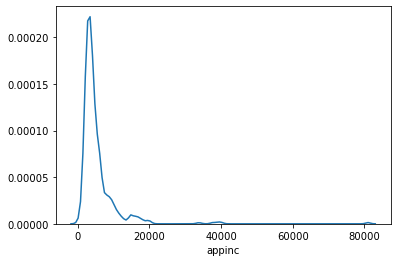

In [63]:
sns.distplot(df['appinc'],hist=False)

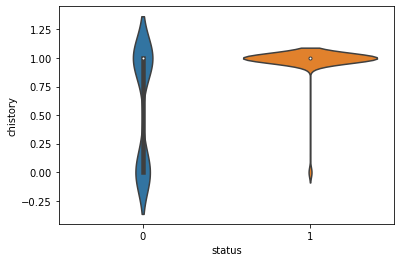

In [64]:
sns.violinplot(y='chistory',x='status',data=df)

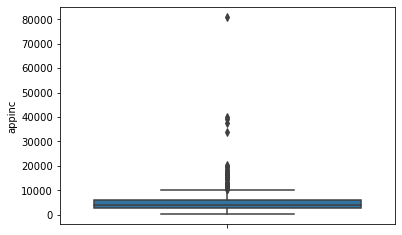

In [65]:
sns.boxplot(y='appinc',data=df)

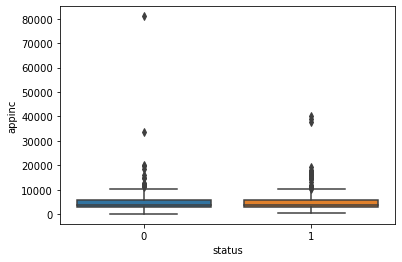

In [66]:
sns.boxplot(y='appinc',x='status',data=df)

## Logistic Regression using statsmodels
- feature selection using p-values ( feature selection using statistics )

In [67]:
Xtrain=Xtrain_orig.copy()
Xtest=Xtest_orig.copy()

In [68]:
Xtrain[:2]

,appinc,coappinc,amnt,term,gender_Male,married_Yes,dependents_1,dependents_2,dependents_3+,edu_Not Graduate,selfemp_Yes,proparea_Semiurban,proparea_Urban,chistory_1.0
265,-0.222741,0.681801,0.111985,0.287834,1,0,0,0,0,0,0,0,0,1
191,1.103185,-0.587477,0.282863,0.287834,1,0,0,0,0,0,0,1,0,1


In [69]:
import statsmodels.api as sm
Xtrain_1=sm.add_constant(Xtrain) # adds a column of 1
model=sm.GLM(  ytrain,Xtrain_1,family=sm.families.Binomial()  ) # model object creation
results=model.fit() # ML 


In [70]:
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 status   No. Observations:                  408
Model:                            GLM   Df Residuals:                      393
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -190.83
Date:                Sat, 21 May 2022   Deviance:                       381.66
Time:                        16:36:50   Pearson chi2:                     403.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.7820      0

## 'chistory_1.0 ' , 'proparea_Semiurban' is significant as their p-value<.05

In [71]:
Xtrain2=Xtrain[['chistory_1.0','proparea_Semiurban']]
Xtest2=Xtest[['chistory_1.0','proparea_Semiurban']]

In [72]:
model=linear_model.LogisticRegression()
model.fit(Xtrain2,ytrain)
predtrain=model.predict(Xtrain2)
predtest=model.predict(Xtest2)
print('TRAIN RESULTS')
print('-----------')
printmetrics(ytrain,predtrain)
print('TEST RESULTS')
print('-----------')
printmetrics(ytest,predtest)


TRAIN RESULTS
-----------
AUC :  0.6962
Accuracy : 0.8015
Precision :  0.7874
Recall :  0.9751
F1 :  0.8712
TEST RESULTS
-----------
AUC :  0.7381
Accuracy : 0.8472
Precision :  0.8226
Recall :  1.0
F1 :  0.9027


In [73]:
Xtrain2[:2]

,chistory_1.0,proparea_Semiurban
265,1,0
191,1,1


## feature selection by using correlation

In [74]:
Xtrain[:5]

,appinc,coappinc,amnt,term,gender_Male,married_Yes,dependents_1,dependents_2,dependents_3+,edu_Not Graduate,selfemp_Yes,proparea_Semiurban,proparea_Urban,chistory_1.0
265,-0.222741,0.681801,0.111985,0.287834,1,0,0,0,0,0,0,0,0,1
191,1.103185,-0.587477,0.282863,0.287834,1,0,0,0,0,0,0,1,0,1
199,0.935452,-0.587477,-0.781835,0.287834,1,0,0,0,0,0,1,0,1,1
224,0.138722,-0.587477,-0.190336,0.287834,1,1,0,0,0,0,0,1,0,1
316,-0.286144,-0.587477,-0.295491,0.287834,1,1,0,1,0,0,0,1,0,1


In [75]:
Xtrain.corr() # not checking correlation of combination of columns 

,appinc,coappinc,amnt,term,gender_Male,married_Yes,dependents_1,dependents_2,dependents_3+,edu_Not Graduate,selfemp_Yes,proparea_Semiurban,proparea_Urban,chistory_1.0
appinc,1.000000,-0.103446,0.481336,-0.012918,0.037724,0.043588,0.056546,0.001986,0.140151,-0.119931,0.174295,0.008445,-0.050985,-0.081148
coappinc,-0.103446,1.000000,0.196593,0.000066,0.156710,0.081520,-0.005371,0.016669,-0.037185,-0.071954,-0.007462,-0.020179,0.039698,0.008441
amnt,0.481336,0.196593,1.000000,0.047765,0.143570,0.200143,0.074719,0.111026,0.086335,-0.160312,0.141585,-0.011143,-0.091386,-0.046499
term,-0.012918,0.000066,0.047765,1.000000,-0.077299,-0.103757,-0.121956,0.025432,-0.079399,-0.094713,-0.032217,0.054689,-0.084627,0.034874
gender_Male,0.037724,0.156710,0.143570,-0.077299,1.000000,0.330874,-0.025027,0.140129,0.117611,0.055991,-0.009654,-0.083465,0.028617,0.004779
married_Yes,0.043588,0.081520,0.200143,-0.103757,0.330874,1.000000,0.146858,0.261071,0.176014,-0.013007,0.023538,0.002243,0.029942,0.040048
dependents_1,0.056546,-0.005371,0.074719,-0.121956,-0.025027,0.146858,1.000000,-0.203519,-0.137213,0.001678,0.089733,0.007311,0.082039,-0.031314
dependents_2,0.001986,0.016669,0.111026,0.025432,0.140129,0.261071,-0.203519,1.000000,-0.134840,-0.008244,0.042196,-0.022451,0.049504,0.018570
dependents_3+,0.140151,-0.037185,0.086335,-0.079399,0.117611,0.176014,-0.137213,-0.134840,1.000000,0.050021,-0.032513,-0.024218,-0.071519,-0.050078
edu_Not Graduate,-0.119931,-0.071954,-0.160312,-0.094713,0.055991,-0.013007,0.001678,-0.008244,0.050021,1.000000,0.004969,-0.059964,-0.021279,-0.018880


## variance inflation factor (VIF)
- checks correlation involving combination of columns 

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame() # creates a dataframe with no rows and no columns 
vif['features']=Xtrain.columns # creating a column : 'features'
vif['vif']=[variance_inflation_factor(Xtrain.values,i) for i in range(Xtrain.shape[1])] # caculates vif
vif['vif']=np.round(vif['vif'],2) 
vif=vif.sort_values(by='vif',ascending=False)


###  dependency of 'gender_Male' with some combination of other columns
- vif >10 -> DROP the column
- 5 < vif < 10 -> Check if u can drop 
- vif <5 -> do not drop the column

In [77]:
vif

,features,vif
4,gender_Male,4.93
13,chistory_1.0,4.46
5,married_Yes,3.64
11,proparea_Semiurban,2.11
12,proparea_Urban,1.93
2,amnt,1.54
7,dependents_2,1.49
0,appinc,1.44
6,dependents_1,1.44
9,edu_Not Graduate,1.30
